In [338]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce   
from sklearn.preprocessing import LabelEncoder

In [339]:
import warnings
warnings.filterwarnings('ignore')

train_dir='E:/data_prediction/Train.csv'
test_dir='E:/data_prediction/Test.csv'

df = pd.read_csv(train_dir)
df_test= pd.read_csv(test_dir)


In [340]:
# REMOVING NON-REQUIERED FEATURES

train = df.drop( ['id'] ,axis=1)
test = df_test.drop( ['id'] ,axis=1)

train.head(7)

,relationship_status,industry,genre,targeted_sex,average_runtime,airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True
5,Divorced,Auto,Comedy,Female,40,Primetime,United-States,0.027465,Low,Yes,False
6,Married-civ-spouse,Pharma,Infomercial,Male,50,Morning,Outlying-US(Guam-USVI-etc),0.027465,High,No,False


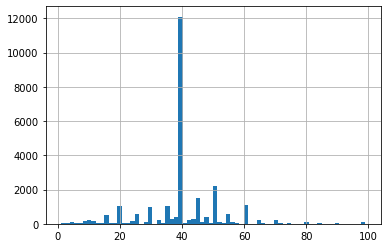

In [341]:
# CONVERTING EVERYHTING TO FLOAT
train['average_runtime']=train['average_runtime'].astype(float)
test['average_runtime']=test['average_runtime'].astype(float)

train['average_runtime'].hist(bins=70)

In [342]:
# counting ratings higher than 0.027464673 
# finding percent of samples having rating higher than 0.027464672

high_ratings_train=train['ratings'][train.ratings>0.027464673]
high_ratings_test=test['ratings'][test.ratings>0.027464673]

print(len(high_ratings_train))
print(len(high_ratings_test))

print(len(high_ratings_train)/len(train.ratings))
print(len(high_ratings_test)/len(test.ratings))

2242
565
0.08607186732186732
0.08674957776754184


In [343]:
# BASED ON ABOVE ANALYSIS IT IS OK TO DROP RATINGS COLUMNS..
# CONSIDERING NETGAIN INDEPENDENT OF RATINGS

train.drop(['ratings'],axis=1,inplace=True)
test.drop(['ratings'],axis=1,inplace=True)

In [344]:
# MOST FREQUENT IS USA

frequent_location_train=train['airlocation'][train.airlocation!='United-States']
frequent_location_test=test['airlocation'][test.airlocation!='United-States']

print(len(frequent_location_train)/len(train))
print(len(frequent_location_test)/len(test))

0.10741707616707617
0.10839858744050361


In [345]:
dummies_train_sex  = pd.get_dummies(train['targeted_sex'])
dummies_train_sex.drop(['Female'],axis=1,inplace=True)

dummies_test_sex  = pd.get_dummies(test['targeted_sex'])
dummies_test_sex.drop(['Female'],axis=1,inplace=True)

train = train.join(dummies_train_sex)
test = test.join(dummies_test_sex)

test.drop(['targeted_sex'],axis=1,inplace=True)
train.drop(['targeted_sex'],axis=1,inplace=True)

In [346]:
# creating dummy column for expensive column

dummies_train_cost  = pd.get_dummies(train['expensive'])
dummies_train_cost.drop(['Medium'],axis=1,inplace=True)

dummies_test_cost  = pd.get_dummies(test['expensive'])
dummies_test_cost.drop(['Medium'],axis=1,inplace=True)

train = train.join(dummies_train_cost)
test = test.join(dummies_test_cost)

test.drop(['expensive'],axis=1,inplace=True)
train.drop(['expensive'],axis=1,inplace=True)


In [347]:
dummies_train_cost  = pd.get_dummies(train['money_back_guarantee'])
dummies_train_cost.drop(['No'],axis=1,inplace=True)

dummies_test_cost  = pd.get_dummies(test['money_back_guarantee'])
dummies_test_cost.drop(['No'],axis=1,inplace=True)

train = train.join(dummies_train_cost)
test = test.join(dummies_test_cost)

test.drop(['money_back_guarantee'],axis=1,inplace=True)
train.drop(['money_back_guarantee'],axis=1,inplace=True)

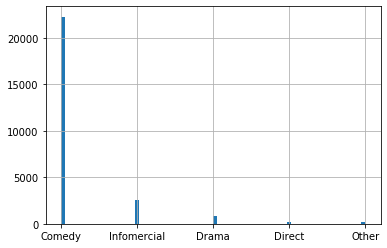

In [348]:
train['genre'].hist(bins=70)

In [349]:
train.drop(['genre'],axis=1,inplace=True)
test.drop(['genre'],axis=1,inplace=True)
# FOR SAME REASON AS RATINGS DROPPING AIRLOCATION COLUMN

train.drop(['airlocation'],axis=1,inplace=True)
test.drop(['airlocation'],axis=1,inplace=True)

In [350]:
#ce_target = ce.TargetEncoder(cols = ['relationship_status','industry','airtime','netgain'],return_df=True,smoothing=10)
#ce_target.fit(train, train['netgain'])
#train=ce_target.transform(train, train['netgain'])

dummies_train_cost  = pd.get_dummies(train['relationship_status'])
dummies_train_cost.drop(['Divorced'],axis=1,inplace=True)

dummies_test_cost  = pd.get_dummies(test['relationship_status'])
dummies_test_cost.drop(['Divorced'],axis=1,inplace=True)

train = train.join(dummies_train_cost)
test = test.join(dummies_test_cost)

test.drop(['relationship_status'],axis=1,inplace=True)
train.drop(['relationship_status'],axis=1,inplace=True)

In [351]:
dummies_train_cost  = pd.get_dummies(train['industry'])
dummies_train_cost.drop(['Auto'],axis=1,inplace=True)

dummies_test_cost  = pd.get_dummies(test['industry'])
dummies_test_cost.drop(['Auto'],axis=1,inplace=True)

train = train.join(dummies_train_cost)
test = test.join(dummies_test_cost)

test.drop(['industry'],axis=1,inplace=True)
train.drop(['industry'],axis=1,inplace=True)

In [352]:
dummies_train_cost  = pd.get_dummies(train['airtime'])
dummies_train_cost.drop(['Morning'],axis=1,inplace=True)

dummies_test_cost  = pd.get_dummies(test['airtime'])
dummies_test_cost.drop(['Morning'],axis=1,inplace=True)

train = train.join(dummies_train_cost)
test = test.join(dummies_test_cost)

test.drop(['airtime'],axis=1,inplace=True)
train.drop(['airtime'],axis=1,inplace=True)

In [353]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26048 entries, 0 to 26047
Data columns (total 19 columns):
average_runtime          26048 non-null float64
netgain                  26048 non-null bool
Male                     26048 non-null uint8
High                     26048 non-null uint8
Low                      26048 non-null uint8
Yes                      26048 non-null uint8
Married-AF-spouse        26048 non-null uint8
Married-civ-spouse       26048 non-null uint8
Married-spouse-absent    26048 non-null uint8
Never-married            26048 non-null uint8
Separated                26048 non-null uint8
Widowed                  26048 non-null uint8
ClassAction              26048 non-null uint8
Entertainment            26048 non-null uint8
Other                    26048 non-null uint8
Pharma                   26048 non-null uint8
Political                26048 non-null uint8
Daytime                  26048 non-null uint8
Primetime                26048 non-null uint8
dtypes: bool(1),

In [354]:
from sklearn.model_selection import train_test_split

X = train.drop(['netgain'], axis = 1)
Y = train['netgain']

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.20, random_state = 10)

In [355]:
X_Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20838 entries, 23705 to 17673
Data columns (total 18 columns):
average_runtime          20838 non-null float64
Male                     20838 non-null uint8
High                     20838 non-null uint8
Low                      20838 non-null uint8
Yes                      20838 non-null uint8
Married-AF-spouse        20838 non-null uint8
Married-civ-spouse       20838 non-null uint8
Married-spouse-absent    20838 non-null uint8
Never-married            20838 non-null uint8
Separated                20838 non-null uint8
Widowed                  20838 non-null uint8
ClassAction              20838 non-null uint8
Entertainment            20838 non-null uint8
Other                    20838 non-null uint8
Pharma                   20838 non-null uint8
Political                20838 non-null uint8
Daytime                  20838 non-null uint8
Primetime                20838 non-null uint8
dtypes: float64(1), uint8(17)
memory usage: 671.5 KB


In [356]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [357]:
trainedmodel = LogisticRegression().fit(X_Train,Y_Train)
predictions =trainedmodel.predict(X_Test)
print(confusion_matrix(Y_Test,predictions))
print(classification_report(Y_Test,predictions))

[[3710  280]
 [ 823  397]]
              precision    recall  f1-score   support

       False       0.82      0.93      0.87      3990
        True       0.59      0.33      0.42      1220

    accuracy                           0.79      5210
   macro avg       0.70      0.63      0.64      5210
weighted avg       0.76      0.79      0.76      5210



In [358]:
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

[[3601  389]
 [ 760  460]]
              precision    recall  f1-score   support

       False       0.83      0.90      0.86      3990
        True       0.54      0.38      0.44      1220

    accuracy                           0.78      5210
   macro avg       0.68      0.64      0.65      5210
weighted avg       0.76      0.78      0.76      5210



In [359]:
trainedsvm = svm.LinearSVC().fit(X_Train, Y_Train)
predictionsvm = trainedsvm.predict(X_Test)
print(confusion_matrix(Y_Test,predictionsvm))
print(classification_report(Y_Test,predictionsvm))

[[3966   24]
 [1188   32]]
              precision    recall  f1-score   support

       False       0.77      0.99      0.87      3990
        True       0.57      0.03      0.05      1220

    accuracy                           0.77      5210
   macro avg       0.67      0.51      0.46      5210
weighted avg       0.72      0.77      0.68      5210



In [360]:
trainedlda = LinearDiscriminantAnalysis().fit(X_Train, Y_Train)
predictionlda = trainedlda.predict(X_Test)
print(confusion_matrix(Y_Test,predictionlda))
print(classification_report(Y_Test,predictionlda))

[[3523  467]
 [ 669  551]]
              precision    recall  f1-score   support

       False       0.84      0.88      0.86      3990
        True       0.54      0.45      0.49      1220

    accuracy                           0.78      5210
   macro avg       0.69      0.67      0.68      5210
weighted avg       0.77      0.78      0.77      5210



In [361]:
trainednb = GaussianNB().fit(X_Train, Y_Train)
predictionnb = trainednb.predict(X_Test)
print(confusion_matrix(Y_Test,predictionnb))
print(classification_report(Y_Test,predictionnb))


[[2532 1458]
 [ 168 1052]]
              precision    recall  f1-score   support

       False       0.94      0.63      0.76      3990
        True       0.42      0.86      0.56      1220

    accuracy                           0.69      5210
   macro avg       0.68      0.75      0.66      5210
weighted avg       0.82      0.69      0.71      5210



In [362]:
from keras.utils.np_utils import to_categorical
Y_Train = to_categorical(Y_Train)

In [363]:
print(type(X_Train))
print(type(Y_Train))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [364]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation

#Y_Test = to_categorical(Y_Test)


input_dim = X_Train.shape[1]
nb_classes = Y_Train.shape[1]

# Here's a Deep Dumb MLP (DDMLP)
model = Sequential()
model.add(Dense(512, input_dim=input_dim))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(nb_classes))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))

# we'll use categorical xent for the loss, and RMSprop as the optimizer
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',)

print("Training...")
model.fit(X_Train, Y_Train, nb_epoch=50, batch_size=16, validation_split=0.05, verbose=80)

preds = model.predict_classes(X_Test, verbose=0)

Training...
Train on 19796 samples, validate on 1042 samples
Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


In [365]:
print(confusion_matrix(Y_Test,preds))
print(classification_report(Y_Test,preds))

[[3556  434]
 [ 700  520]]
              precision    recall  f1-score   support

       False       0.84      0.89      0.86      3990
        True       0.55      0.43      0.48      1220

    accuracy                           0.78      5210
   macro avg       0.69      0.66      0.67      5210
weighted avg       0.77      0.78      0.77      5210



###  BEST MODEL OBTAINED IS OF LOGESTIC REGRESSION

In [367]:
predictions_Final =trainedmodel.predict(test)

In [371]:
submission = pd.DataFrame({
        "id": df_test["id"],
        "netgain": predictions_Final
    })
submission.to_csv('E:/data_prediction/sample_submissions.csv', index=False)

In [372]:
forest_pred=trainedforest.predict(test)

In [373]:
submission = pd.DataFrame({
        "id": df_test["id"],
        "netgain": forest_pred
    })
submission.to_csv('E:/data_prediction/sample_submissions1.csv', index=False)